In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost

In [24]:
df_tr = pd.read_csv('C:\\Users\\nsingh6\\Desktop\\ML_Artivatic_dataset\\train_indessa.csv')
df_te = pd.read_csv('C:\\Users\\nsingh6\\Desktop\\ML_Artivatic_dataset\\test_indessa.csv')
print (df_tr.head(5))

   member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0   58189336      14350        14350          14350.0  36 months   
1   70011223       4800         4800           4800.0  36 months   
2   70255675      10000        10000          10000.0  36 months   
3    1893936      15000        15000          15000.0  36 months   
4    7652106      16000        16000          16000.0  36 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   

      ...     collections_12_mths_ex_med mths_since_last_major_derog  \
0     ...                       

In [25]:
print (df_tr.isnull().any())

member_id                      False
loan_amnt                      False
funded_amnt                    False
funded_amnt_inv                False
term                           False
batch_enrolled                  True
int_rate                       False
grade                          False
sub_grade                      False
emp_title                       True
emp_length                      True
home_ownership                 False
annual_inc                      True
verification_status            False
pymnt_plan                     False
desc                            True
purpose                        False
title                           True
zip_code                       False
addr_state                     False
dti                            False
delinq_2yrs                     True
inq_last_6mths                  True
mths_since_last_delinq          True
mths_since_last_record          True
open_acc                        True
pub_rec                         True
r

In [26]:
print (((df_tr.isnull() | df_tr.isna()).sum() * 100 / df_tr.index.size).round(2))

member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
batch_enrolled                 15.99
int_rate                        0.00
grade                           0.00
sub_grade                       0.00
emp_title                       5.79
emp_length                      5.05
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
pymnt_plan                      0.00
desc                           85.80
purpose                         0.00
title                           0.02
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
inq_last_6mths                  0.00
mths_since_last_delinq         51.19
mths_since_last_record         84.58
open_acc                        0.00
pub_rec                         0.00
r

In [27]:
dfTrain = df_tr[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 
                   'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
                   'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 
                   'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 
                   'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                   'total_rev_hi_lim', 'loan_status']]
dfTest = df_te[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term',
                 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
                 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 
                 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
                 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 
                 'total_rev_hi_lim']]

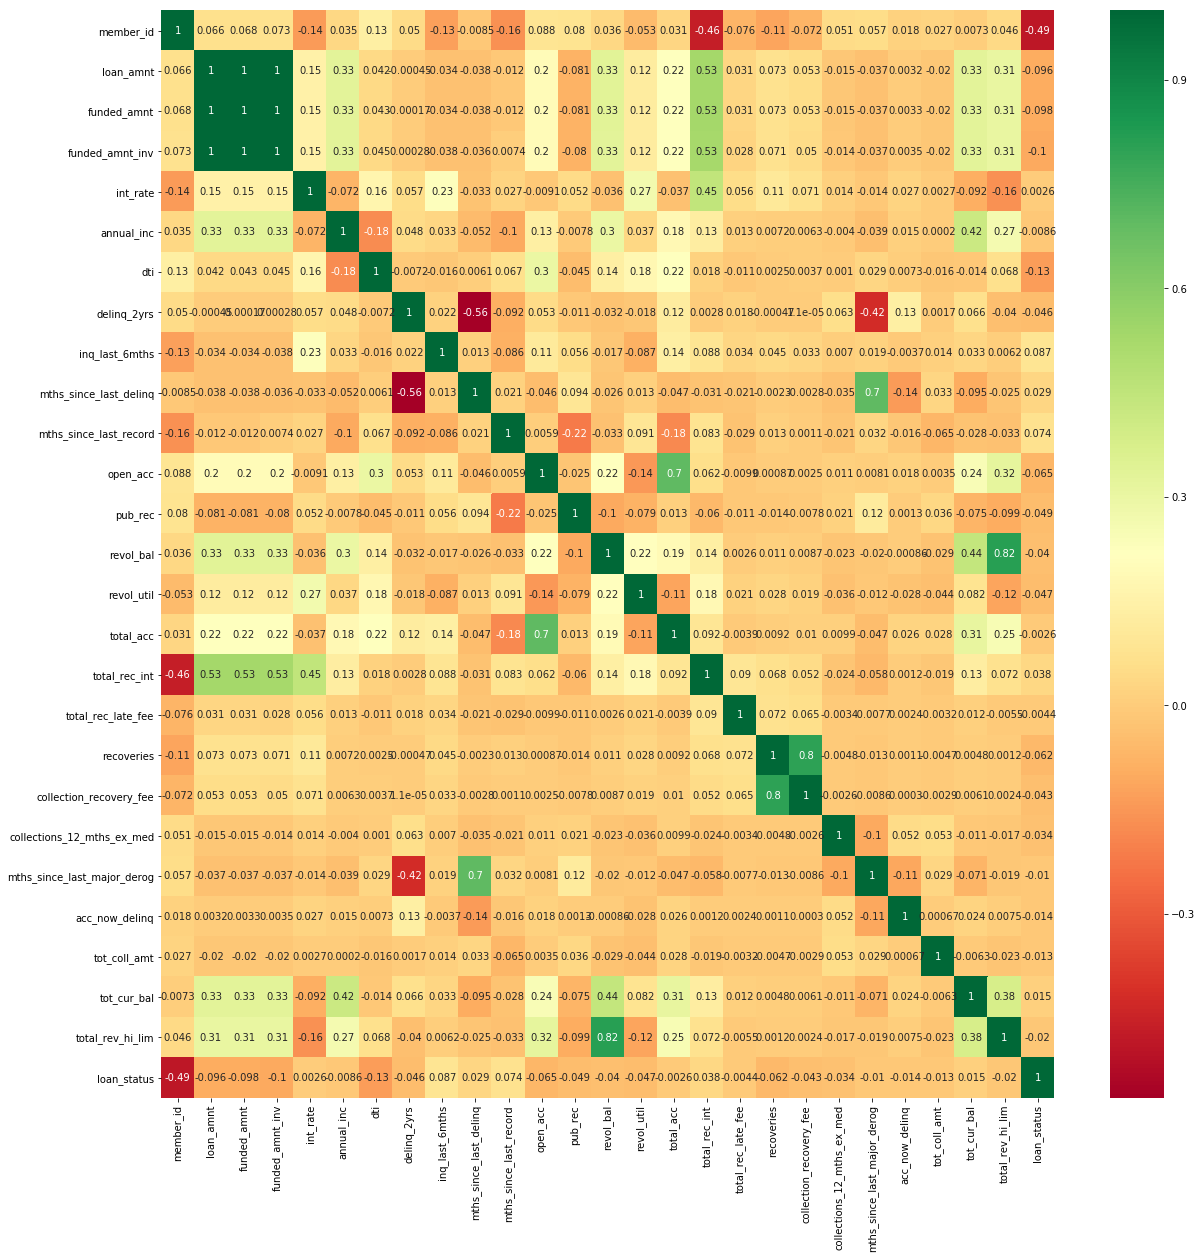

In [17]:
import seaborn as sns
corrmat = dfTrain.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(dfTrain[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
dfTrain['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTrain['term'] = pd.to_numeric(dfTrain['term'], errors='coerce')
dfTest['term'] = pd.to_numeric(dfTest['term'], errors='coerce')
dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTest['emp_length'].replace('n/a', '0', inplace=True)
dfTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')
dfTest['emp_length'] = pd.to_numeric(dfTest['emp_length'], errors='coerce')

dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')
dfTest['last_week_pay'] = pd.to_numeric(dfTest['last_week_pay'], errors='coerce')

dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')


In [5]:
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)
    dfTest[col].fillna(dfTest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)
    dfTest[col].fillna(0, inplace=True)

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done.


In [19]:
test_member_id = pd.DataFrame(dfTest['member_id'])
train_target = pd.DataFrame(dfTrain['loan_status'])
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]
finalTest = dfTest[selected_cols]
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100)
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay']/(finalTrain['term']/12*52+1))*100) + ((finalTrain['recoveries']/finalTrain['funded_amnt_inv']) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay']/(finalTest['term']/12*52+1))*100) + ((finalTest['recoveries']/finalTest['funded_amnt_inv']) * 100)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [20]:
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [10]:
st = datetime.now()
clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)
y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'
accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'
accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))
final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_member_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

Initializing xgboost.sklearn.XGBClassifier and starting training...


C:\Users\nsingh6\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nsingh6\AppData\Roaming\Python\Python36\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.967735
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.968442
[2]	validation_0-auc:0.968771
[3]	validation_0-auc:0.96974
[4]	validation_0-auc:0.970124
[5]	validation_0-auc:0.970309
[6]	validation_0-auc:0.970497
[7]	validation_0-auc:0.970629
[8]	validation_0-auc:0.970886
[9]	validation_0-auc:0.971294
[10]	validation_0-auc:0.971628
[11]	validation_0-auc:0.971925
[12]	validation_0-auc:0.972059
[13]	validation_0-auc:0.972125
[14]	validation_0-auc:0.972196
[15]	validation_0-auc:0.97231
[16]	validation_0-auc:0.972379
[17]	validation_0-auc:0.972417
[18]	validation_0-auc:0.972516
[19]	validation_0-auc:0.972604
[20]	validation_0-auc:0.972739
[21]	validation_0-auc:0.972789
[22]	validation_0-auc:0.972843
[23]	validation_0-auc:0.972904
[24]	validation_0-auc:0.973011
[25]	validation_0-auc:0.973051
[26]	validation_0-auc:0.973118
[27]	validation_0-auc:0.973146
[28]	validation_0-auc:0.973194
[29]	validation_0-auc:0.973244
[30]	validation_0-

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[1.9000499e-01 1.6640857e-02 1.8924382e-02 9.9740154e-04 1.0105252e-02
 3.9161135e-02 5.1234942e-02 4.0001050e-02 5.7298090e-02 1.9921783e-02
 1.2073807e-02 1.8661907e-02 3.8452454e-02 4.7324076e-02 1.7375784e-02
 4.8321478e-02 1.6352136e-02 1.0288984e-02 1.3220820e-01 4.9765084e-02
 3.2599282e-02 8.2154386e-03 9.0291081e-03 0.0000000e+00 9.7377887e-03
 5.2494815e-05 7.6117483e-04 4.8898920e-02 5.1444918e-03 2.5433738e-02
 6.2731304e-03 1.2703746e-02 6.0369037e-03]
0 member_id
1 emp_length
2 loan_amnt
3 funded_amnt
4 funded_amnt_inv
5 sub_grade
6 int_rate
7 annual_inc
8 dti
9 mths_since_last_delinq
10 mths_since_last_record
11 open_acc
12 revol_bal
13 revol_util
14 total_acc
15 total_rec_int
16 total_rec_late_fee
17 mths_since_last_major_derog
18 last_week_pay
19 tot_cur_bal
20 total_rev_hi_lim
21 tot_coll_amt
22 recoveries
23 collection_recovery_fee
24 term
25 acc_now_delinq
26 collections_12_mths_ex_med
27 loan_to_income
28 bad_state
29 avl_lines
30 int_paid
31 emi_paid_progress_perc

<Figure size 640x480 with 1 Axes>